<a href="https://colab.research.google.com/github/sunshineluyao/CV_XAI/blob/master/Econometrics/Econometrics_10_8_2021_Lastest_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# data source: 

https://github.com/sunshineluyao/CVML2021

# Code Source: For previous updates:

https://github.com/sunshineluyao/CV_ML/tree/master/Data2020

In [ ]:
import pandas as pd 
import numpy as np
###show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
print('Authenticated')

KeyboardInterrupt: ignored

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/sunshineluyao/CVML2021/main/BTC_2020_12_31.csv',index_col='Unnamed: 0')
df.head()

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,FeeMedUSD,FeeTotNtv,FeeTotUSD,HashRate,IssContNtv,IssContPctAnn,IssContUSD,IssTotNtv,IssTotUSD,NVTAdj,NVTAdj90,PriceBTC,PriceUSD,ROI1yr,ROI30d,SplyCur,SplyExpFut10yrCMBI,SplyFF,TxCnt,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d,Volume,Annualized_DilutionRate,Total daily transaction volume,Velocity,The daily revenue of bitcoin miners,The accumulated revenue of bitcoin miners,P/E Ratio,Metcalfe,PM,<1d,1d ~ 1m,1m ~ 1q,1q ~ 6m,6m ~ 1y,1y ~ 2y,2y ~ 3y,3y ~ 4y,4y ~ 5y,5y~10y,>10y,One-year staking ratio,Two-year staking ratio,Three-year staking ratio,Four-year staking ratio,Five-year staking ratio,Ten-year staking ratio,Token Utility,PU Ratio,volatility30,volatility60,volatility90,volatility180,Token Utility_volatility,PU Ratio_volatility
2009-01-03,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-04,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-05,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-06,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-07,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Generate return for different time ranges

In [ ]:
df["ROI1"] =df['PriceUSD'].pct_change(1)
df["ROI7"] =df['PriceUSD'].pct_change(7)
df["ROI30"] =df['PriceUSD'].pct_change(30)
df["ROI90"] =df['PriceUSD'].pct_change(90)
df["ROI180"] =df['PriceUSD'].pct_change(180)
df["ROI360"] =df['PriceUSD'].pct_change(360)

In [ ]:
columns_ROI = ["ROI1", "ROI7","ROI30","ROI90","ROI180","ROI360"]
df_ROI = df[columns_ROI].dropna()
df_ROI.head()

,ROI1,ROI7,ROI30,ROI90,ROI180,ROI360
2011-07-13,-0.003553,-0.050516,-0.285067,12.990625,33.929509,161.761586
2011-07-14,0.001898,-0.054018,-0.273125,13.230311,35.264183,172.242259
2011-07-15,-0.013687,-0.034453,-0.290676,12.191245,34.694797,183.736145
2011-07-16,-0.006759,-0.046478,-0.235161,11.487755,38.236278,172.160546
2011-07-17,-0.033176,-0.093333,-0.141110,10.534497,41.359613,225.752004


In [ ]:
df_ROI.tail()

,ROI1,ROI7,ROI30,ROI90,ROI180,ROI360
2020-12-27,-0.001783,0.123353,0.545519,1.463870,1.890524,2.804739
2020-12-28,0.023022,0.178831,0.523740,1.494142,1.925912,2.696269
2020-12-29,0.007095,0.146245,0.496971,1.527879,1.994287,2.708375
2020-12-30,0.059249,0.237580,0.466844,1.719492,2.181383,2.926825
2020-12-31,0.006173,0.224191,0.542069,1.745731,2.180142,2.737243


In [ ]:
df_ROI['ROI1'].count()

3460

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

FileNotFoundError: ignored

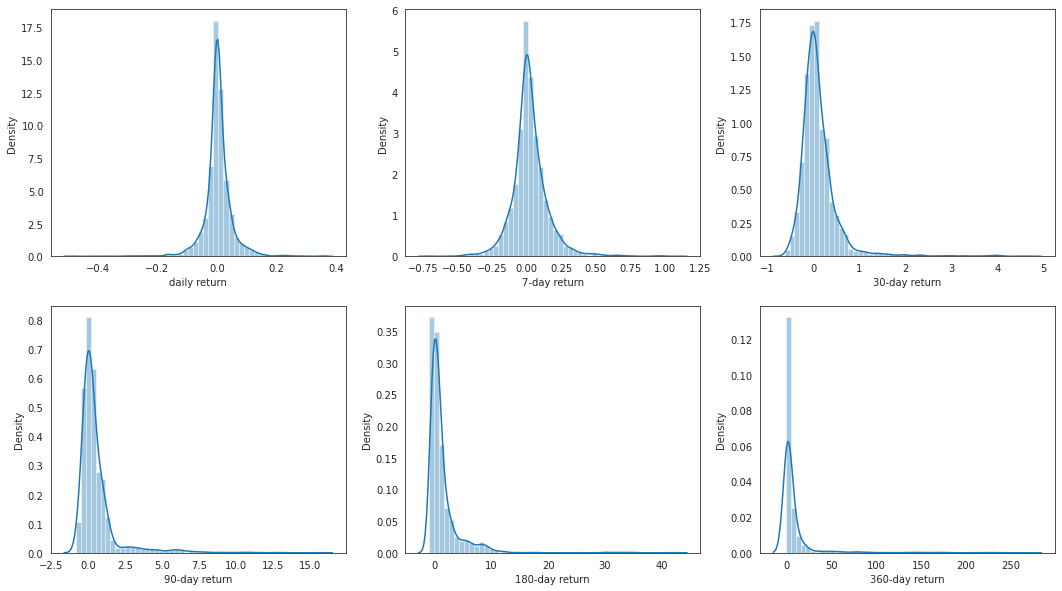

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np
sns.set_style("white")
fig, ax = plt.subplots(2, 3, figsize=(18, 10))
sns.distplot(ax=ax[0, 0],x=df_ROI.ROI1, axlabel="daily return")
sns.distplot(ax=ax[0, 1],x=df_ROI.ROI7, axlabel="7-day return")
sns.distplot(ax=ax[0, 2],x=df_ROI.ROI30, axlabel="30-day return")
sns.distplot(ax=ax[1, 0],x=df_ROI.ROI90, axlabel="90-day return")
sns.distplot(ax=ax[1, 1],x=df_ROI.ROI180, axlabel="180-day return")
sns.distplot(ax=ax[1, 2],x=df_ROI.ROI360, axlabel="360-day return")
plt.savefig('/content/drive/MyDrive/DeFi/CVML2021/ROI.png')
plt.show()

In [ ]:
df_ROI_agg=df_ROI.agg(["mean","std","skew","kurt"], axis=0)

In [ ]:
df_ROI_agg =df_ROI_agg.transpose()
df_ROI_agg

,mean,std,skew,kurt
ROI1,0.003343,0.047077,-0.206956,13.327667
ROI7,0.023624,0.132050,1.117996,7.291459
ROI30,0.118321,0.430599,4.155114,28.805420
ROI90,0.517465,1.393044,4.190716,23.867260
ROI180,1.394251,3.261427,5.832102,50.868819
ROI360,8.085476,24.853241,5.987535,41.536407


In [ ]:
df_ROI_agg.columns

Index(['mean', 'std', 'skew', 'kurt'], dtype='object')

In [ ]:
df_ROI_agg = df_ROI_agg.astype("float64")
df_ROI_agg.dtypes

mean    float64
std     float64
skew    float64
kurt    float64
dtype: object

In [ ]:
df_ROI_agg["shape_ratio"] = df_ROI_agg["mean"]/df_ROI_agg["std"]
pd.options.display.float_format = '{:.2%}'.format
df_ROI_agg

,mean,std,skew,kurt,shape_ratio
ROI1,0.33%,4.71%,-20.70%,1332.77%,7.10%
ROI7,2.36%,13.20%,111.80%,729.15%,17.89%
ROI30,11.83%,43.06%,415.51%,2880.54%,27.48%
ROI90,51.75%,139.30%,419.07%,2386.73%,37.15%
ROI180,139.43%,326.14%,583.21%,5086.88%,42.75%
ROI360,808.55%,2485.32%,598.75%,4153.64%,32.53%


In [ ]:
pd.options.display.float_format = '{:.4f}'.format

In [ ]:
df_ROI_agg

,mean,std,skew,kurt,shape_ratio
ROI1,0.0033,0.0471,-0.2070,13.3277,0.0710
ROI7,0.0236,0.1320,1.1180,7.2915,0.1789
ROI30,0.1183,0.4306,4.1551,28.8054,0.2748
ROI90,0.5175,1.3930,4.1907,23.8673,0.3715
ROI180,1.3943,3.2614,5.8321,50.8688,0.4275
ROI360,8.0855,24.8532,5.9875,41.5364,0.3253


# calculate t-statistics

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
reg = smf.ols('ROI360 ~ 1', data=df_ROI).fit(cov_type='HAC',cov_kwds={'maxlags':1})
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                 ROI360   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 30 Jan 2022   Prob (F-statistic):                nan
Time:                        18:54:46   Log-Likelihood:                -16026.
No. Observations:                3460   AIC:                         3.205e+04
Df Residuals:                    3459   BIC:                         3.206e+04
Df Model:                           0                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.0855      0.596     13.569      0.0

In [ ]:
cd /content/drive/MyDrive/DeFi/CVML2021

[Errno 2] No such file or directory: '/content/drive/MyDrive/DeFi/CVML2021'
/content


In [ ]:
df_ROI_agg.to_excel("output.xlsx") 

# miracles and disasters

In [ ]:
disaster5=df_ROI[df_ROI["ROI1"]<=-0.05].count()["ROI1"]
disaster10=df_ROI[df_ROI["ROI1"]<=-0.1].count()["ROI1"]
disaster20=df_ROI[df_ROI["ROI1"]<=-0.2].count()["ROI1"]
disaster30=df_ROI[df_ROI["ROI1"]<=-0.3].count()["ROI1"]

In [ ]:
[disaster5, disaster10,disaster20, disaster30]

[255, 70, 12, 4]

In [ ]:
[disaster5, disaster10,disaster20, disaster30]/df_ROI['ROI1'].count()

array([0.07369942, 0.02023121, 0.00346821, 0.00115607])

In [ ]:
miracle5=df_ROI[df_ROI["ROI1"]>=0.05].count()["ROI1"]
miracle10=df_ROI[df_ROI["ROI1"]>=0.1].count()["ROI1"]
miracle20=df_ROI[df_ROI["ROI1"]>=0.2].count()["ROI1"]
miracle30=df_ROI[df_ROI["ROI1"]>=0.3].count()["ROI1"]

In [ ]:
[miracle5, miracle10,miracle20, miracle30]

[309, 96, 16, 4]

In [ ]:
[miracle5, miracle10,miracle20, miracle30]/df_ROI['ROI1'].count()

array([0.08930636, 0.02774566, 0.00462428, 0.00115607])

In [ ]:
df_ROI[df_ROI["ROI1"]>=0].count()["ROI1"]/df["ROI1"].count()

0.49227546478135636

In [ ]:
df_ROI[df_ROI["ROI7"]>=0].count()["ROI7"]/df["ROI7"].count()

0.5145554681353265

In [ ]:
df_ROI[df_ROI["ROI30"]>=0].count()["ROI7"]/df["ROI7"].count()

0.5234723314975085

In [ ]:
df_ROI[df_ROI["ROI90"]>=0].count()["ROI7"]/df["ROI7"].count()

0.5654340414371886

In [ ]:
df_ROI[df_ROI["ROI180"]>=0].count()["ROI7"]/df["ROI7"].count()

0.6060844479412536

In [ ]:
df_ROI[df_ROI["ROI360"]>=0].count()["ROI7"]/df["ROI7"].count()

0.7149226330972988

# Cryptocurrency Value Ratios

In [ ]:
df["Past100"]=-df["PriceUSD"].pct_change(700)

In [ ]:
df["AMR"] = df["AdrActCnt"]/df["CapMrktCurUSD"]

In [ ]:
df['TMR'] = df["TxTfrValAdjUSD"]/df["CapMrktCurUSD"]

In [ ]:
df['PMR'] = df['TxTfrCnt']/df["CapMrktCurUSD"]

In [ ]:
df['EPR'] =1/df["P/E Ratio"]

In [ ]:
df['TVN']=1/df['NVTAdj90']

In [ ]:
df["MPR"]=1/df['PM']

In [ ]:
df['UPR']=1/df["PU Ratio"]

In [ ]:
columns_Ratio = ["Past100","AMR",'TMR','PMR','EPR','TVN',"MPR",'UPR']

In [ ]:
df_Ratio =df[columns_Ratio]
df_Ratio.head()

,Past100,AMR,TMR,PMR,EPR,TVN,MPR,UPR
2009-01-03,nan,nan,nan,nan,nan,nan,nan,nan
2009-01-04,nan,nan,nan,nan,nan,nan,nan,nan
2009-01-05,nan,nan,nan,nan,nan,nan,nan,nan
2009-01-06,nan,nan,nan,nan,nan,nan,nan,nan
2009-01-07,nan,nan,nan,nan,nan,nan,nan,nan


In [ ]:
df_Ratio = df_Ratio.dropna()
df_Ratio.head()

,Past100,AMR,TMR,PMR,EPR,TVN,MPR,UPR
2012-06-17,-71.2270,0.0007,0.0297,0.0017,0.3245,0.0226,2.5450,0.5313
2012-06-18,-77.1045,0.0006,0.0322,0.0014,0.3459,0.0224,2.1455,0.5155
2012-06-19,-85.9039,0.0006,0.0365,0.0013,0.2905,0.0219,2.0391,0.4916
2012-06-20,-83.5222,0.0005,0.0400,0.0012,0.2862,0.0215,1.6022,0.4686
2012-06-21,-113.1148,0.0005,0.0285,0.0010,0.2686,0.0218,1.3094,0.4751


# first principal component

https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_pcr_vs_pls.html

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [ ]:
scaler = preprocessing.MinMaxScaler()
min_max_scaler = preprocessing.MinMaxScaler()

In [ ]:
scaled_df_Ratio = pd.DataFrame(min_max_scaler.fit_transform(df_Ratio), columns=df_Ratio.columns, index=df_Ratio.index)
scaled_df_Ratio.head()

,Past100,AMR,TMR,PMR,EPR,TVN,MPR,UPR
2012-06-17,0.7249,0.9112,0.2433,1.0000,0.9354,0.4158,0.1997,0.6279
2012-06-18,0.7025,0.8282,0.2683,0.8367,1.0000,0.4099,0.1668,0.6092
2012-06-19,0.6688,0.7952,0.3105,0.8080,0.8326,0.3990,0.1580,0.5808
2012-06-20,0.6779,0.6934,0.3444,0.7261,0.8196,0.3888,0.1220,0.5536
2012-06-21,0.5648,0.6272,0.2319,0.5862,0.7667,0.3948,0.0978,0.5613


In [ ]:
scaled_df_Ratio["FPC"] = PCA(n_components=1).fit_transform(scaled_df_Ratio)

In [ ]:
scaled_df_Ratio.corr()

,Past100,AMR,TMR,PMR,EPR,TVN,MPR,UPR,FPC
Past100,1.0000,-0.3930,-0.1559,-0.3949,-0.6487,-0.0300,0.2995,-0.2310,-0.5459
AMR,-0.3930,1.0000,0.4830,0.9757,0.8081,0.4153,0.1655,0.8822,0.9356
TMR,-0.1559,0.4830,1.0000,0.4469,0.3863,0.4788,0.4131,0.3994,0.5509
PMR,-0.3949,0.9757,0.4469,1.0000,0.7830,0.3710,0.0708,0.8947,0.9146
EPR,-0.6487,0.8081,0.3863,0.7830,1.0000,0.3704,-0.0157,0.6206,0.9094
TVN,-0.0300,0.4153,0.4788,0.3710,0.3704,1.0000,0.4092,0.4166,0.5771
MPR,0.2995,0.1655,0.4131,0.0708,-0.0157,0.4092,1.0000,0.0473,0.1330
UPR,-0.2310,0.8822,0.3994,0.8947,0.6206,0.4166,0.0473,1.0000,0.8324
FPC,-0.5459,0.9356,0.5509,0.9146,0.9094,0.5771,0.1330,0.8324,1.0000


<Figure size 1296x576 with 0 Axes>

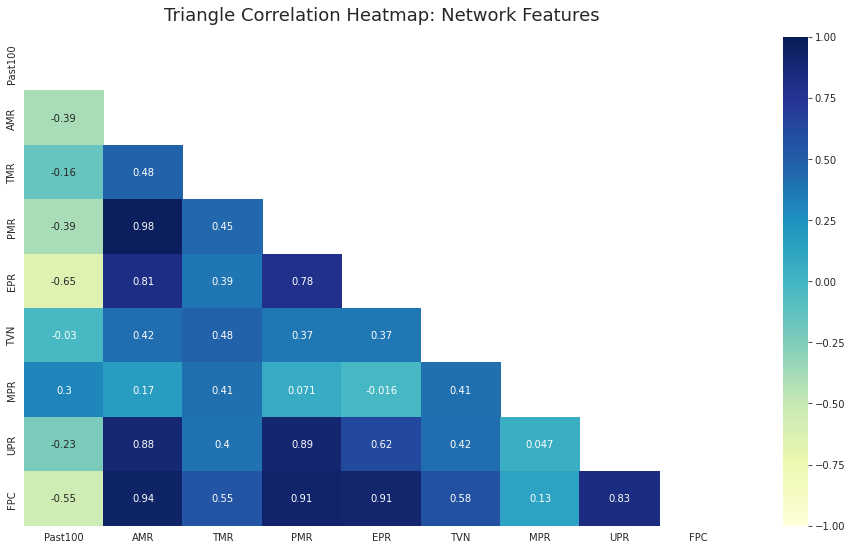

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Increase the size of the heatmap.
plt.figure(figsize=(18, 8))
#triangle
import numpy as np
mask = np.triu(np.ones_like(scaled_df_Ratio.corr(), dtype=np.bool))
fig, ax = plt.subplots(figsize=(16,9))
ax = sns.heatmap(scaled_df_Ratio.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='YlGnBu') #control colors: https://www.python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/#:~:text=You%20can%20customize%20the%20colors,heatmap()%20function%20in%20seaborn.&text=It%20is%20also%20possible%20to,vmin%20parameters%20in%20the%20function.
ax.set_title('Triangle Correlation Heatmap: Network Features', fontdict={'fontsize':18}, pad=16);

In [ ]:
fig.savefig('heatmap_nocbar.png')

# Regressions

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
df_Regression=df[columns_ROI].merge(scaled_df_Ratio, left_index=True, right_index=True)
df_Regression.head()

,ROI1,ROI7,ROI30,ROI90,ROI180,ROI360,Past100,AMR,TMR,PMR,EPR,TVN,MPR,UPR,PC_ratios
2012-06-17,-0.0379,0.1360,0.2113,0.3252,0.5686,-0.6459,0.7249,0.9112,0.2433,1.0000,0.9354,0.4158,0.1997,0.6279,1.3883
2012-06-18,0.0179,0.1296,0.2344,0.3064,0.6227,-0.6396,0.7025,0.8282,0.2683,0.8367,1.0000,0.4099,0.1668,0.6092,1.3381
2012-06-19,0.0292,0.1340,0.2749,0.3482,0.6640,-0.6291,0.6688,0.7952,0.3105,0.8080,0.8326,0.3990,0.1580,0.5808,1.2215
2012-06-20,0.0306,0.1327,0.3139,0.4152,0.6997,-0.5909,0.6779,0.6934,0.3444,0.7261,0.8196,0.3888,0.1220,0.5536,1.1335
2012-06-21,-0.0032,0.1191,0.3111,0.4222,0.6937,-0.6017,0.5648,0.6272,0.2319,0.5862,0.7667,0.3948,0.0978,0.5613,1.0456


In [ ]:
df_Regression["ROI1_future"] = df_Regression["ROI1"].shift(-1)
df_Regression["ROI7_future"] = df_Regression["ROI7"].shift(-7)
df_Regression["ROI30_future"] = df_Regression["ROI30"].shift(-30)
df_Regression["ROI90_future"] = df_Regression["ROI90"].shift(-90)
df_Regression["ROI180_future"] = df_Regression["ROI180"].shift(-180)
df_Regression["ROI360_future"] = df_Regression["ROI360"].shift(-360)

In [ ]:
columns_Ratio =columns_Ratio+["PC_ratios"]

In [ ]:
df_Regression =df_Regression.dropna()

In [ ]:
df_Regression.to_csv("regression.csv")

In [ ]:
!pip install stargazer
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
from IPython.core.display import Latex

In [ ]:
results1 = smf.ols('ROI7_future ~ 1+ Past100', data=df_Regression).fit(cov_type='HAC',cov_kwds={'maxlags':1})
results2 = smf.ols('ROI7_future ~ 1+ AMR', data=df_Regression).fit(cov_type='HAC',cov_kwds={'maxlags':1})
results3 = smf.ols('ROI7_future ~ 1+ TMR', data=df_Regression).fit(cov_type='HAC',cov_kwds={'maxlags':1})
results4 = smf.ols('ROI7_future ~ 1+ PMR', data=df_Regression).fit(cov_type='HAC',cov_kwds={'maxlags':1})
results5 = smf.ols('ROI7_future ~ 1+ EPR', data=df_Regression).fit(cov_type='HAC',cov_kwds={'maxlags':1})
results6 = smf.ols('ROI7_future ~ 1+ TVN', data=df_Regression).fit(cov_type='HAC',cov_kwds={'maxlags':1})
results7 = smf.ols('ROI7_future ~ 1+ MPR', data=df_Regression).fit(cov_type='HAC',cov_kwds={'maxlags':1})
results8 = smf.ols('ROI7_future ~ 1+ UPR', data=df_Regression).fit(cov_type='HAC',cov_kwds={'maxlags':1})
results9 = smf.ols('ROI7_future ~ 1+ PC_ratios', data=df_Regression).fit(cov_type='HAC',cov_kwds={'maxlags':1})

In [ ]:
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:            ROI7_future   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.510
Date:                Fri, 08 Oct 2021   Prob (F-statistic):              0.219
Time:                        11:20:48   Log-Likelihood:                 1668.3
No. Observations:                2760   AIC:                            -3333.
Df Residuals:                    2758   BIC:                            -3321.
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0585      0.028      2.115      0.0

In [ ]:
stargazer_weekly = Stargazer([results1,results2,results3,results4,results5,results6,results7,results8,results9])
stargazer_weekly.title('Prediction on Future 1-week return')
stargazer_weekly.significant_digits(3)
stargazer_weekly.covariate_order(columns_Ratio)
HTML(stargazer_weekly.render_html())

In [ ]:
results1 = smf.ols('ROI30_future ~ 1+ Past100', data=df_Regression).fit(cov_type='HAC',cov_kwds={'maxlags':1})
results2 = smf.ols('ROI30_future ~ 1+ AMR', data=df_Regression).fit(cov_type='HAC',cov_kwds={'maxlags':1})
results3 = smf.ols('ROI30_future ~ 1+ TMR', data=df_Regression).fit(cov_type='HAC',cov_kwds={'maxlags':1})
results4 = smf.ols('ROI30_future ~ 1+ PMR', data=df_Regression).fit(cov_type='HAC',cov_kwds={'maxlags':1})
results5 = smf.ols('ROI30_future ~ 1+ EPR', data=df_Regression).fit(cov_type='HAC',cov_kwds={'maxlags':1})
results6 = smf.ols('ROI30_future ~ 1+ TVN', data=df_Regression).fit(cov_type='HAC',cov_kwds={'maxlags':1})
results7 = smf.ols('ROI30_future ~ 1+ MPR', data=df_Regression).fit(cov_type='HAC',cov_kwds={'maxlags':1})
results8 = smf.ols('ROI30_future ~ 1+ UPR', data=df_Regression).fit(cov_type='HAC',cov_kwds={'maxlags':1})
results9 = smf.ols('ROI30_future ~ 1+ PC_ratios', data=df_Regression).fit(cov_type='HAC',cov_kwds={'maxlags':1})

In [ ]:
stargazer_weekly = Stargazer([results1,results2,results3,results4,results5,results6,results7,results8,results9])
stargazer_weekly.title('Prediction on Future 1-week return')
stargazer_weekly.significant_digits(3)
stargazer_weekly.covariate_order(columns_Ratio)
HTML(stargazer_weekly.render_html())

In [ ]:
print(results9.summary())

                            OLS Regression Results                            
Dep. Variable:           ROI30_future   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     66.69
Date:                Fri, 08 Oct 2021   Prob (F-statistic):           4.78e-16
Time:                        11:25:13   Log-Likelihood:                -1704.4
No. Observations:                2760   AIC:                             3413.
Df Residuals:                    2758   BIC:                             3425.
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1281      0.012     10.903      0.0

In [ ]:
results1 = smf.ols('ROI90_future ~ 1+ Past100', data=df_Regression).fit(cov_type='HAC',cov_kwds={'maxlags':1})
results2 = smf.ols('ROI90_future ~ 1+ AMR', data=df_Regression).fit(cov_type='HAC',cov_kwds={'maxlags':1})
results3 = smf.ols('ROI90_future ~ 1+ TMR', data=df_Regression).fit(cov_type='HAC',cov_kwds={'maxlags':1})
results4 = smf.ols('ROI90_future ~ 1+ PMR', data=df_Regression).fit(cov_type='HAC',cov_kwds={'maxlags':1})
results5 = smf.ols('ROI90_future ~ 1+ EPR', data=df_Regression).fit(cov_type='HAC',cov_kwds={'maxlags':1})
results6 = smf.ols('ROI90_future ~ 1+ TVN', data=df_Regression).fit(cov_type='HAC',cov_kwds={'maxlags':1})
results7 = smf.ols('ROI90_future ~ 1+ MPR', data=df_Regression).fit(cov_type='HAC',cov_kwds={'maxlags':1})
results8 = smf.ols('ROI90_future ~ 1+ UPR', data=df_Regression).fit(cov_type='HAC',cov_kwds={'maxlags':1})
results9 = smf.ols('ROI90_future ~ 1+ PC_ratios', data=df_Regression).fit(cov_type='HAC',cov_kwds={'maxlags':1})

In [ ]:
stargazer_weekly = Stargazer([results1,results2,results3,results4,results5,results6,results7,results8,results9])
stargazer_weekly.title('Prediction on Future 1-week return')
stargazer_weekly.significant_digits(3)
stargazer_weekly.covariate_order(columns_Ratio)
HTML(stargazer_weekly.render_html())

In [ ]:
print(results9.summary())

                            OLS Regression Results                            
Dep. Variable:           ROI90_future   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     51.23
Date:                Fri, 08 Oct 2021   Prob (F-statistic):           1.05e-12
Time:                        11:30:38   Log-Likelihood:                -4641.5
No. Observations:                2760   AIC:                             9287.
Df Residuals:                    2758   BIC:                             9299.
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4874      0.031     15.615      0.0

In [ ]:
results1 = smf.ols('ROI180_future ~ 1+ Past100', data=df_Regression).fit(cov_type='HAC',cov_kwds={'maxlags':1})
results2 = smf.ols('ROI180_future ~ 1+ AMR', data=df_Regression).fit(cov_type='HAC',cov_kwds={'maxlags':1})
results3 = smf.ols('ROI180_future ~ 1+ TMR', data=df_Regression).fit(cov_type='HAC',cov_kwds={'maxlags':1})
results4 = smf.ols('ROI180_future ~ 1+ PMR', data=df_Regression).fit(cov_type='HAC',cov_kwds={'maxlags':1})
results5 = smf.ols('ROI180_future ~ 1+ EPR', data=df_Regression).fit(cov_type='HAC',cov_kwds={'maxlags':1})
results6 = smf.ols('ROI180_future ~ 1+ TVN', data=df_Regression).fit(cov_type='HAC',cov_kwds={'maxlags':1})
results7 = smf.ols('ROI180_future ~ 1+ MPR', data=df_Regression).fit(cov_type='HAC',cov_kwds={'maxlags':1})
results8 = smf.ols('ROI180_future ~ 1+ UPR', data=df_Regression).fit(cov_type='HAC',cov_kwds={'maxlags':1})
results9 = smf.ols('ROI180_future ~ 1+ PC_ratios', data=df_Regression).fit(cov_type='HAC',cov_kwds={'maxlags':1})

In [ ]:
stargazer_weekly = Stargazer([results1,results2,results3,results4,results5,results6,results7,results8,results9])
stargazer_weekly.title('Prediction on Future 1-week return')
stargazer_weekly.significant_digits(3)
stargazer_weekly.covariate_order(columns_Ratio)
HTML(stargazer_weekly.render_html())

In [ ]:
print(results9.summary())

                            OLS Regression Results                            
Dep. Variable:          ROI180_future   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     143.8
Date:                Fri, 08 Oct 2021   Prob (F-statistic):           2.53e-32
Time:                        11:35:24   Log-Likelihood:                -5740.2
No. Observations:                2760   AIC:                         1.148e+04
Df Residuals:                    2758   BIC:                         1.150e+04
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0846      0.046     23.536      0.0

In [ ]:
results1 = smf.ols('ROI360_future ~ 1+ Past100', data=df_Regression).fit(cov_type='HAC',cov_kwds={'maxlags':1})
results2 = smf.ols('ROI360_future ~ 1+ AMR', data=df_Regression).fit(cov_type='HAC',cov_kwds={'maxlags':1})
results3 = smf.ols('ROI360_future ~ 1+ TMR', data=df_Regression).fit(cov_type='HAC',cov_kwds={'maxlags':1})
results4 = smf.ols('ROI360_future ~ 1+ PMR', data=df_Regression).fit(cov_type='HAC',cov_kwds={'maxlags':1})
results5 = smf.ols('ROI360_future ~ 1+ EPR', data=df_Regression).fit(cov_type='HAC',cov_kwds={'maxlags':1})
results6 = smf.ols('ROI360_future ~ 1+ TVN', data=df_Regression).fit(cov_type='HAC',cov_kwds={'maxlags':1})
results7 = smf.ols('ROI360_future ~ 1+ MPR', data=df_Regression).fit(cov_type='HAC',cov_kwds={'maxlags':1})
results8 = smf.ols('ROI360_future ~ 1+ UPR', data=df_Regression).fit(cov_type='HAC',cov_kwds={'maxlags':1})
results9 = smf.ols('ROI360_future ~ 1+ PC_ratios', data=df_Regression).fit(cov_type='HAC',cov_kwds={'maxlags':1})

In [ ]:
stargazer_weekly = Stargazer([results1,results2,results3,results4,results5,results6,results7,results8,results9])
stargazer_weekly.title('Prediction on Future 1-week return')
stargazer_weekly.significant_digits(3)
stargazer_weekly.covariate_order(columns_Ratio)
HTML(stargazer_weekly.render_html())

In [ ]:
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:          ROI360_future   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.108
Date:                Fri, 08 Oct 2021   Prob (F-statistic):             0.0239
Time:                        11:39:33   Log-Likelihood:                -10267.
No. Observations:                2760   AIC:                         2.054e+04
Df Residuals:                    2758   BIC:                         2.055e+04
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.1113      0.990      6.173      0.0